In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import yfinance as yf

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/Thanhibanani/DAVE3625Oblig2/main/TSLA.csv"
#Find the raw url from the github repo
df = pd.read_csv(url)
display(df)






,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3351,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000


SLETT FØR LEVERING
Tatt bare fra chatGPT:

Vet ikke hva dette gjør, men får et svar xd
La dette være utgangspunkt mby

Mean Squared Error: 2.7314218997759086e-20
Root Mean Squared Error: 1.6527013946190972e-10
R-squared: 1.0


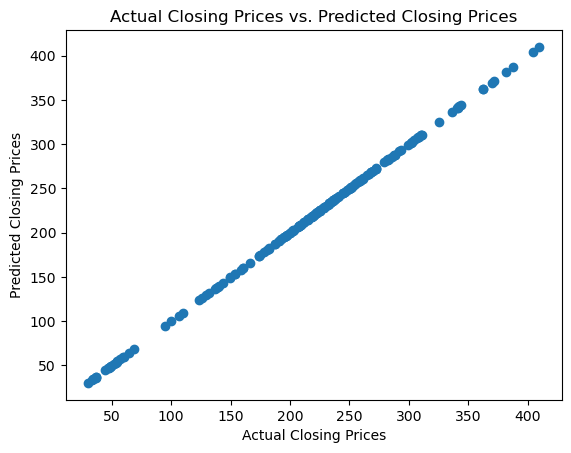

In [83]:

import matplotlib.pyplot as plt
from sklearn import metrics  # Add this import statement
# Extract features (independent variables) and target variable
# For this example, we'll use 'Open', 'High', 'Low', 'Adjusted Close', and 'Volume'
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']  # Predicting the closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.title("Actual Closing Prices vs. Predicted Closing Prices")
plt.show()







test


In [67]:
#Create linear regression model
#test
tesla_data =yf.download('TSLA',start='2020-01-01', end='2023-12-1')
feature=tesla_data[['High']]
target =tesla_data[['Close']]
regression = LinearRegression()
regression.fit(feature,target)
#Make predictions

future_date = [[2023-11-20]]
prediction =regression.predict(future_date)
print("The predicted share price for Tesla on the future date is", prediction[0])

[*********************100%%**********************]  1 of 1 completed


KeyError: "None of [Index(['High, Volume'], dtype='object')] are in the [columns]"

Test 2


In [81]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Load the data from Yahoo Finance
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Assuming 'Category' is a categorical column
# Encode the 'Category' column using one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df.values.reshape(-1, 1))


# Assuming 'Close' column contains the closing stock prices
Y = df['Close']

# Create your feature matrix (X) by combining features and encoded categories
X = pd.concat([df[['High', 'Low', 'Volume']], pd.DataFrame(encoded_categories)], axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, Y_train)
 
# Define the features for the specific date
specific_date_features = [['High','Low','Volume']]  # Replace with actual values

# Make predictions for the specific date
predicted_price = linear_regressor.predict(specific_date_features)

# Print the predicted price
print("Predicted Price on Specific Date:", predicted_price[0])
from sklearn.metrics import mean_absolute_error

y_pred = linear_regressor.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
prediction_percentage_score = 100 - (mae / Y_test.mean() * 100)

print("Prediction Percentage Score:", prediction_percentage_score)

[*********************100%%**********************]  1 of 1 completed


ValueError: Found input variables with inconsistent numbers of samples: [6741, 963]

In [93]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the data from Yahoo Finance
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Specify the specific date you want to predict
specific_date = '2023-10-31'  # Replace with the specific date you want

# Check if the specific date exists in the DataFrame
if specific_date in df.index:
    specific_data = df[df.index == specific_date]

    # Extract the specific feature values
    specific_open = specific_data['Open'].values[0]
    specific_high = specific_data['High'].values[0]
    specific_low = specific_data['Low'].values[0]
    specific_adj_close = specific_data['Adj Close'].values[0]
    specific_volume = specific_data['Volume'].values[0]

    # Define the features for the specific date as a 2D array
    specific_date_features = [[specific_open, specific_high, specific_low, specific_adj_close, specific_volume]]

    # Assuming 'Close' column contains the closing stock prices
    Y = df['Close']

    # Create your feature matrix (X)
    X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Create a linear regression model
    linear_regressor = LinearRegression()

    # Fit the model to the training data
    linear_regressor.fit(X_train, Y_train)

    # Make predictions for the specific date
    predicted_price = linear_regressor.predict(specific_date_features)

    # Access the numeric prediction
    predicted_price_numeric = predicted_price[0]

    # Print the predicted price
    print("Predicted Price on Specific Date:", predicted_price_numeric)

    # Make predictions on the test data
    y_pred = linear_regressor.predict(X_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_test, y_pred)

    print("Mean Absolute Error (MAE):", mae)
else:
    print(f"The specific date '{specific_date}' does not exist in the dataset.")




[*********************100%%**********************]  1 of 1 completed
The specific date '2023-10-31' does not exist in the dataset.


In [94]:
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression

# Load historical data
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Extract features (X) and target variable (Y)
X = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
Y = df['Close']

# Split the data into training and testing sets
X_train, X_test = X[:-30], X[-30:]
Y_train, Y_test = Y[:-30], Y[-30:]

# Create and train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

# Predict future stock prices
future_price_predictions = linear_regressor.predict(X_test)

# Print the predicted future prices
print("Predicted Future Prices:", future_price_predictions)


[*********************100%%**********************]  1 of 1 completed
Predicted Future Prices: [265.27999878 266.5        262.58999634 255.69999695 244.88000488
 246.99000549 244.11999512 240.5        246.38000488 250.22000122
 251.6000061  246.52999878 261.16000366 260.04998779 260.52999878
 259.67001343 263.61999512 262.98999023 258.86999512 251.11999512
 253.91999817 254.8500061  242.67999268 220.11000061 211.99000549
 212.08000183 216.52000427 212.41999817 205.75999451 207.30000305]


In [1]:
import pandas as pd
import yfinance as yf
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Load historical data
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Prepare the data for Prophet
df = df.reset_index()
df = df[['Date', 'Close']]
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=30)  # Predict the next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Stock Price Forecast for TSLA")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

[*********************100%%**********************]  1 of 1 completed


c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be g

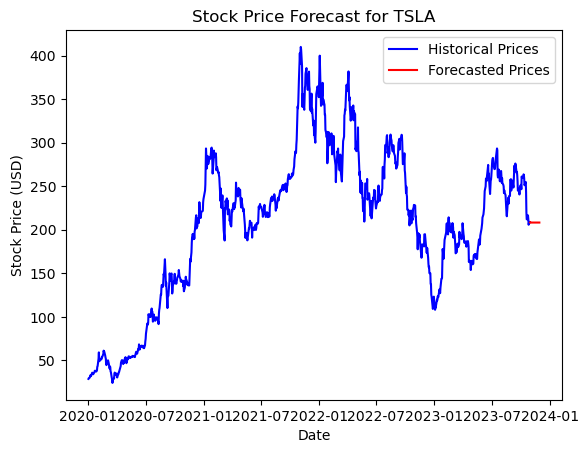

Forecasted Prices for the Next 30 Days:
964    208.365099
965    208.031655
966    208.255714
967    208.310562
968    208.263143
969    208.249740
970    208.270097
971    208.268916
972    208.265164
973    208.265210
974    208.266732
975    208.266248
976    208.266060
977    208.266127
978    208.266222
979    208.266161
980    208.266161
981    208.266167
982    208.266172
983    208.266167
984    208.266168
985    208.266168
986    208.266168
987    208.266168
988    208.266168
989    208.266168
990    208.266168
991    208.266168
992    208.266168
993    208.266168
Name: predicted_mean, dtype: float64


In [5]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load historical data
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Extract the 'Close' column
data = df['Close']

# Fit an ARIMA model
model = ARIMA(data, order=(5, 1, 0))  # ARIMA(5,1,0) for example; adjust the order as needed
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Create a date range for the forecasted values
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=31)  # 31 days including the last day

# Plot historical and forecasted prices
plt.plot(df.index, data, label='Historical Prices', color='blue')
plt.plot(forecast_index[1:], forecast, label='Forecasted Prices', color='red')  # Exclude the first date in the forecast
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Stock Price Forecast for TSLA')
plt.legend()
plt.show()

print("Forecasted Prices for the Next 30 Days:")
print(forecast)




[*********************100%%**********************]  1 of 1 completed


c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Thanh\miniconda3\envs\dave3625Oblig2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be g

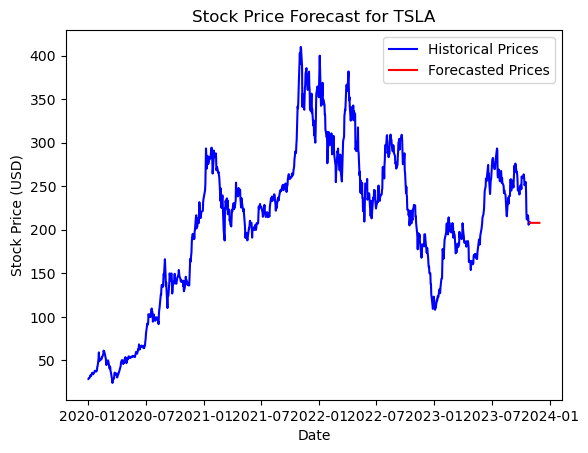

Forecasted Prices for the Next 30 Days:
964    208.046070
965    207.707674
966    207.932332
967    207.965443
968    207.925235
969    207.910810
970    207.931449
971    207.928797
972    207.925960
973    207.925760
974    207.927341
975    207.926749
976    207.926652
977    207.926682
978    207.926788
979    207.926718
980    207.926726
981    207.926728
982    207.926735
983    207.926728
984    207.926730
985    207.926730
986    207.926730
987    207.926730
988    207.926730
989    207.926730
990    207.926730
991    207.926730
992    207.926730
993    207.926730
Name: predicted_mean, dtype: float64
Mean Absolute Error (MAE): 34.930018103230985
Prediction Percentage Score: 85.60585725851737


In [6]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load historical data
df = yf.download('TSLA', start='2020-01-01', end='2023-12-01')

# Extract the 'Close' column
data = df['Close']

# Fit an ARIMA model
model = ARIMA(data, order=(5, 1, 0))  # ARIMA(5,1,0) for example; adjust the order as needed
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Calculate Mean Absolute Error (MAE)
actual_prices = data[-30:].values  # Actual prices for the last 30 days
mae = mean_absolute_error(actual_prices, forecast)

# Calculate the prediction percentage score
prediction_percentage_score = 100 - (mae / actual_prices.mean() * 100)

# Create a date range for the forecasted values
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=31)  # 31 days including the last day

# Plot historical and forecasted prices
plt.plot(df.index, data, label='Historical Prices', color='blue')
plt.plot(forecast_index[1:], forecast, label='Forecasted Prices', color='red')  # Exclude the first date in the forecast
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Stock Price Forecast for TSLA')
plt.legend()
plt.show()

print("Forecasted Prices for the Next 30 Days:")
print(forecast)
print("Mean Absolute Error (MAE):", mae)
print("Prediction Percentage Score:", prediction_percentage_score)
